In [54]:
from PIL import Image,ImageFilter
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import matplotlib.pyplot as plt
#Youssef Hesham shahen 20107033
#Assem Abdelrahman Abbas 20102225

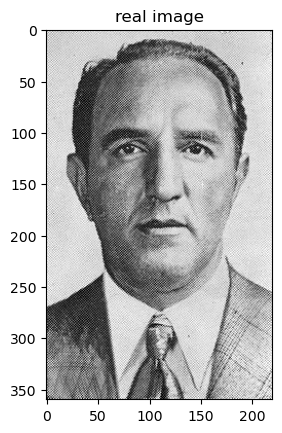

In [55]:
image_path = 'Alo.jpg'

qualities = [10, 50, 75, 95]

for quality in qualities:
    img = Image.open(image_path)
    output_filename = f"output_image_{quality}.jpg"
    img.save(output_filename, "JPEG", quality=quality)

plt.title("real image")
plt.imshow(img,cmap='gray')




(array([33., 56., 90., 16.,  9., 11.,  6., 14., 10., 11.]),
 array([ 50. , 131.8, 213.6, 295.4, 377.2, 459. , 540.8, 622.6, 704.4,
        786.2, 868. ]),
 <BarContainer object of 10 artists>)

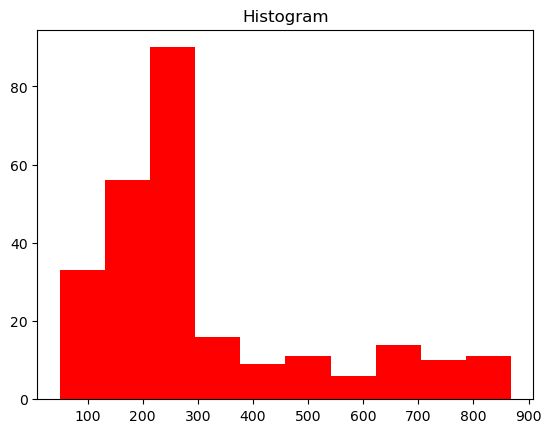

In [56]:
plt.title('Histogram')
img = img.histogram()
plt.hist(img,color='red')


C:\Users\hp\AppData\Local\Temp\ipykernel_13404\1641337102.py:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(original_img, compressed_img, multichannel=True)


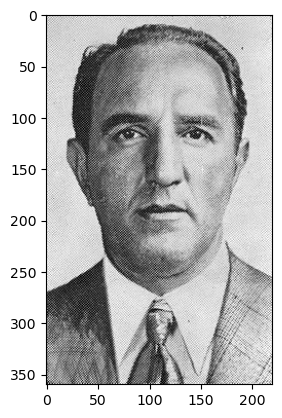

In [5]:
original_img = Image.open('Alo.jpg')
original_img = np.array(original_img)
metrics = []
output_filename = f"output_image_{quality}.jpg"
compressed_img = Image.open(output_filename)
compressed_img = np.array(compressed_img)

mse = mean_squared_error(original_img, compressed_img)
psnr = peak_signal_noise_ratio(original_img, compressed_img)
ssim = structural_similarity(original_img, compressed_img, multichannel=True)
metrics.append((quality, mse, psnr, ssim))


plt.imshow(compressed_img,cmap="gray")


Text(0, 0.5, 'SSIM')

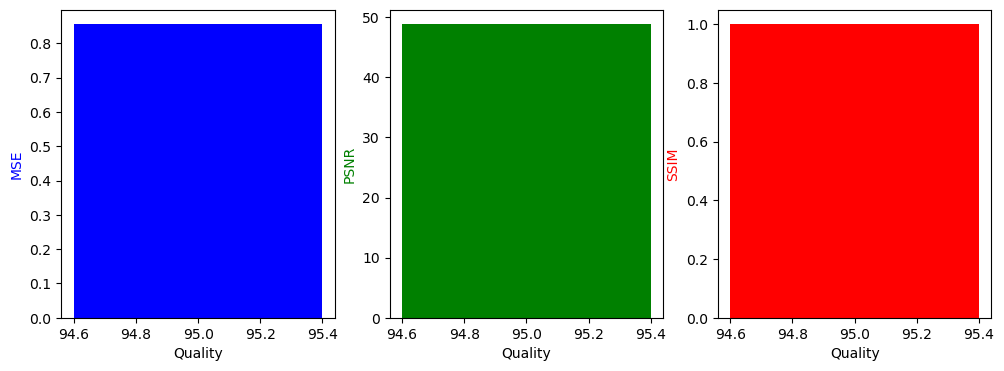

In [31]:
qualities, mses, psnrs, ssims = zip(*metrics)
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(qualities, mses,color='blue')
plt.xlabel('Quality')
plt.ylabel('MSE',color='blue')

plt.subplot(132)
plt.bar(qualities, psnrs,color='green')
plt.xlabel('Quality')
plt.ylabel('PSNR',color='green')

plt.subplot(133)
plt.bar(qualities, ssims,color='red')
plt.xlabel('Quality')
plt.ylabel('SSIM',color='red')



C:\Users\hp\AppData\Local\Temp\ipykernel_13404\2389049273.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  upscaled_imgNEA = img.resize((img.width*2, img.height*2), resample=Image.NEAREST)
C:\Users\hp\AppData\Local\Temp\ipykernel_13404\2389049273.py:6: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  upscaled_imgBIL = img.resize((img.width*2, img.height*2), resample=Image.BILINEAR)
C:\Users\hp\AppData\Local\Temp\ipykernel_13404\2389049273.py:7: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  upscaled_imgBIC = img.resize((img.width*2, img.height*2), resample=Image.BICUBIC)


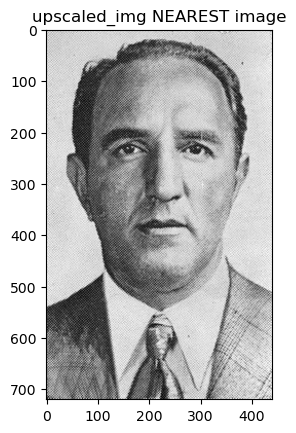

In [22]:
#Upsampling:
img = Image.open("Alo.jpg")

# Upscale the image by a factor of 2 using nearest neighbor interpolation
upscaled_imgNEA = img.resize((img.width*2, img.height*2), resample=Image.NEAREST)
upscaled_imgBIL = img.resize((img.width*2, img.height*2), resample=Image.BILINEAR)
upscaled_imgBIC = img.resize((img.width*2, img.height*2), resample=Image.BICUBIC)

plt.title("upscaled_img NEAREST image")
plt.imshow(upscaled_imgNEA ,cmap='gray')


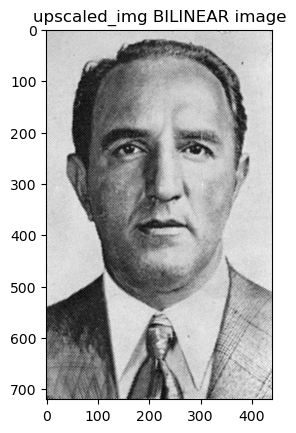

In [23]:
plt.title("upscaled_img BILINEAR image")
plt.imshow(upscaled_imgBIL ,cmap='gray')


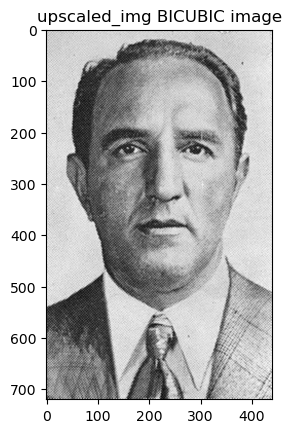

In [24]:
plt.title("upscaled_img BICUBIC image")
plt.imshow(upscaled_imgBIC,cmap='gray')

Text(0.5, 1.0, 'Bicubic Interpolation')

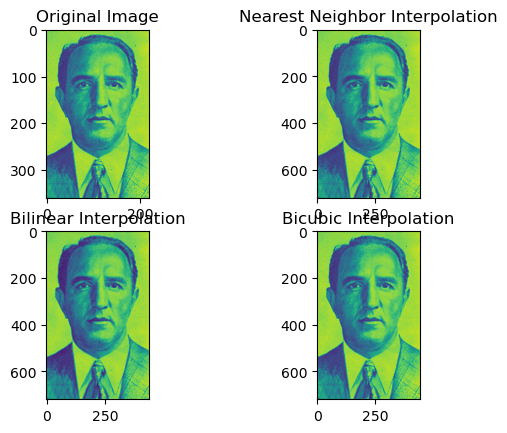

In [25]:
fig, axs = plt.subplots(2, 2)

# Display the original image and the three upscaled images
axs[0, 0].imshow(img)
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(upscaled_imgNEA)
axs[0, 1].set_title("Nearest Neighbor Interpolation")
axs[1, 0].imshow(upscaled_imgBIL)
axs[1, 0].set_title("Bilinear Interpolation")
axs[1, 1].imshow(upscaled_imgBIC)
axs[1, 1].set_title("Bicubic Interpolation")

C:\Users\hp\AppData\Local\Temp\ipykernel_13404\3320986776.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  nearest = img.resize((img.width//2, img.height//2), resample=Image.NEAREST)


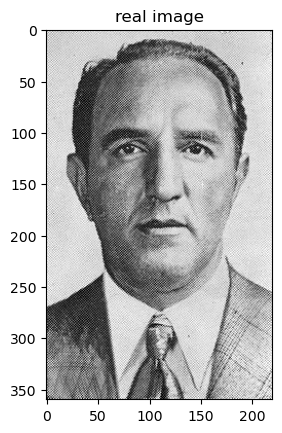

In [26]:
#downsampling:
nearest = img.resize((img.width//2, img.height//2), resample=Image.NEAREST)
average = img.filter(ImageFilter.BoxBlur(5))
max_pool = img.filter(ImageFilter.MaxFilter(size=5))
plt.title("real image")
plt.imshow(img,cmap='gray')


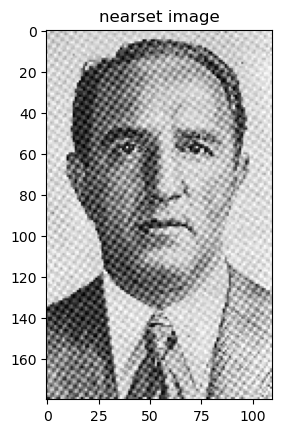

In [27]:
plt.title("nearset image")
plt.imshow(nearest,cmap='gray')


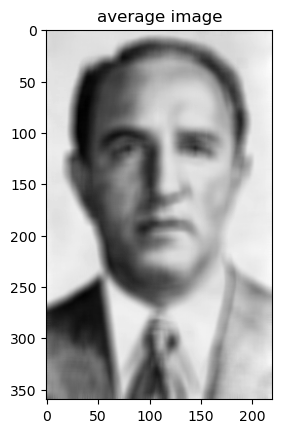

In [28]:
plt.title("average image")
plt.imshow(average,cmap='gray')


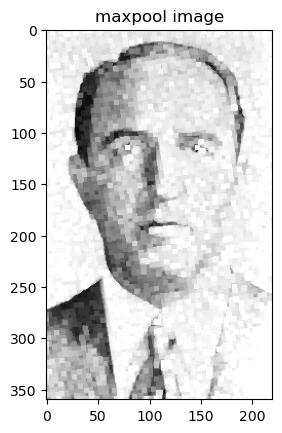

In [29]:
plt.title("maxpool image")
plt.imshow(max_pool,cmap='gray')
plt.show()

Text(0.5, 1.0, 'max_pool')

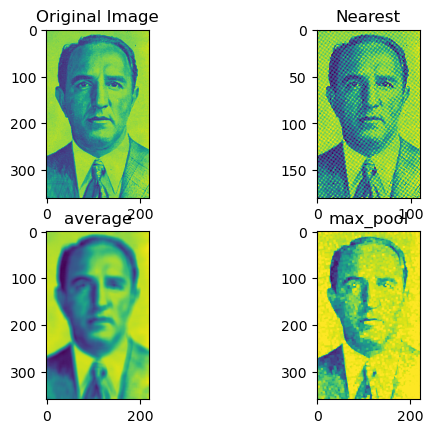

In [30]:
fig, axs = plt.subplots(2, 2)

# Display the original image and the three upscaled images
axs[0, 0].imshow(img)
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(nearest)
axs[0, 1].set_title("Nearest")
axs[1, 0].imshow(average)
axs[1, 0].set_title("average")
axs[1, 1].imshow(max_pool)
axs[1, 1].set_title("max_pool")

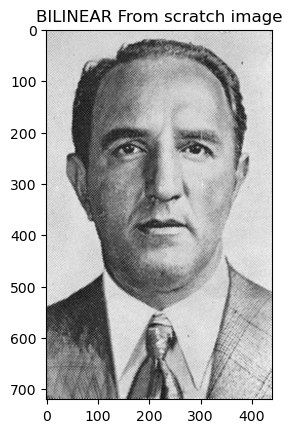

In [49]:
#Upsampling BILINEAR From scratch
scale_factor = 2

img = Image.open('Alo.jpg')
width, height = img.size


new_width, new_height = width * scale_factor, height * scale_factor
upsampled_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)


sx, sy = float(width) / new_width, float(height) / new_height

for i in range(new_height):
    for j in range(new_width):
        x, y = j * sx, i * sy
        x1, y1 = int(np.floor(x)), int(np.floor(y))
        x2, y2 = min(x1+1, width-1), min(y1+1, height-1)
        q11, q21 = img.getpixel((x1, y1)), img.getpixel((x2, y1))
        q12, q22 = img.getpixel((x1, y2)), img.getpixel((x2, y2))
        tx, ty = x - x1, y - y1
        upsampled_img[i, j] = (1-tx)*(1-ty)*q11 + tx*(1-ty)*q21 + (1-tx)*ty*q12 + tx*ty*q22

upsampled_img_pil = Image.fromarray(upsampled_img)
upsampled_img_pil.save('output_image.jpg')

plt.title("BILINEAR From scratch image")
plt.imshow(upsampled_img_pil,cmap='gray')